For default. -2 may be filtered out because they are not using credit card. -1 should not be 0 because they paid their entire credit. 0 is only making at least the minimum payment

There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

Below is the response regarding the values used for fields X6:X11

"This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is:

-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Y: client's behavior; Y=0 then not default, Y=1 then default"
what does default in next month mean?

it means the client will not pay next month

In [83]:
# negative number in pay_0 means same as zero that no payment is owed
pay_dict= {}
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
print(os.listdir())

['.ipynb_checkpoints', 'default-of-credit-card-clients-dataset.zip', 'Default_of_cc2.ipynb', 'default_of_cc3.ipynb', 'default_predictor.ipynb', 'defcon.ipynb', 'UCI_Credit_Card.csv', 'Untitled.ipynb']


In [84]:
df = pd.read_csv('UCI_Credit_Card.csv')
df['PERCENT_LIMIT'] = df['BILL_AMT1']/df['LIMIT_BAL'] 
print(df.columns)


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'PERCENT_LIMIT'],
      dtype='object')


In [85]:
paydf = df.loc[:,['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
print(paydf.info())
      
lister = []
for row in np.array(paydf):
    value = np.any(row>0, axis = 0) 
    lister.append(value)
df['ever_default']=lister
df['ever_default'] = df['ever_default'].map({True:1, False:0})
df['Limit/history'] = df['PERCENT_LIMIT']*df['ever_default']
#paydf['new1'].map({T})   

df2 = df.copy()
pay_dict =  {-2:0, -1:0, 0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8}
df['PAY_0'] = df2.PAY_0.map(pay_dict)

df['PAY_2'] = df2.PAY_2.map(pay_dict)

df['PAY_3'] = df2.PAY_3.map(pay_dict)

df['PAY_4'] = df2.PAY_4.map(pay_dict)
df['PAY_5'] = df2.PAY_5.map(pay_dict)
df['PAY_6'] = df2.PAY_6.map(pay_dict)
#df['total_balance'] = df.BILL_AMT1 - df.PAY_AMT1
#df['total_balance_2'] = df.BILL_AMT2 - df.PAY_AMT1
#df['percent_balance'] = df.PAY_AMT1 / df.BILL_AMT1
df['Total_PAY_AMT']= df.PAY_AMT1 + df.PAY_AMT2 + df.PAY_AMT3  +df.PAY_AMT4 + df.PAY_AMT5 + df.PAY_AMT6
df['avg_months_behind'] = (df2.PAY_0 + df2.PAY_2 + df2.PAY_3 + df2.PAY_4 + df2.PAY_5 + df2.PAY_6)
df['Total_Bill_AMT'] = df.BILL_AMT1 + df.BILL_AMT2 + df.BILL_AMT3 + df.BILL_AMT4 + df.BILL_AMT5 + df.BILL_AMT6
df['bill-paid'] = df.Total_Bill_AMT - df.Total_PAY_AMT
#df['bill/paid'] = df['Total_PAY_AMT'] / df.Total_Bill_AMT
print(df.info())
df2 = df.copy()
df = df.drop(['BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
PAY_0    30000 non-null int64
PAY_2    30000 non-null int64
PAY_3    30000 non-null int64
PAY_4    30000 non-null int64
PAY_5    30000 non-null int64
PAY_6    30000 non-null int64
dtypes: int64(6)
memory usage: 1.4 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 32 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int

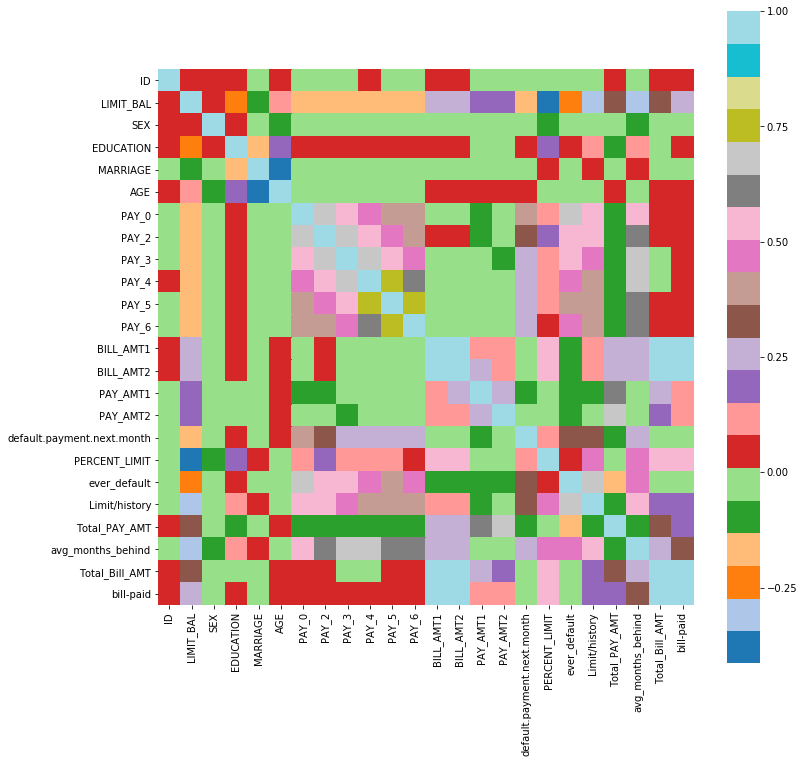

In [86]:

fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
sns.heatmap(df.corr(), square=True, cmap='tab20')

Greatest absolute correlations : 1) Default History 2) Higher Limit_Bal(negative correlatin)

Above we can see the correlations of likelyhood of default payment for the coming month. 
 We can see having a higher limit balance correllates with lower likelyhood of defaulting next month. 
 females are slightly less likely to default on the coming payment than males. 
 
 Single people are slightly less likely to default than married people. 
 
 Being older has a slightly  correlation with increased likelyhood of default. 

The more months behind you are on your payments the greater the likelyhood of  default. Also, an individual's being behind in more recent month is most correlated with not making a payment towards default. 

A lower level of education is slightly correlated with not making a needed payment next month.    

Also, making larger payments in previous months correllates with lower levels of default and the larger an individual's bill amount in general the less likely to default. 

In [87]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,default.payment.next.month,PERCENT_LIMIT,ever_default,Limit/history,Total_PAY_AMT,avg_months_behind,Total_Bill_AMT,bill-paid
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,3.000000e+04,3.000000e+04
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,5663.580500,5.921163e+03,0.221200,0.423771,0.335633,0.153226,3.165139e+04,-1.094633,2.698617e+05,2.382103e+05
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,16563.280354,2.304087e+04,0.415062,0.411462,0.472219,0.320050,6.082768e+04,5.893055,3.795643e+05,3.631651e+05
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,-0.619892,0.000000,-0.619892,0.000000e+00,-12.000000,-3.362590e+05,-2.671514e+06
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,1000.000000,8.330000e+02,0.000000,0.022032,0.000000,0.000000,6.679750e+03,-5.000000,2.868800e+04,4.520750e+03
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,2100.000000,2.009000e+03,0.000000,0.313994,0.000000,0.000000,1.438300e+04,0.000000,1.263110e+05,1.019230e+05
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,5006.000000,5.000000e+03,0.000000,0.829843,1.000000,0.016369,3.350350e+04,0.000000,3.426265e+05,3.057178e+05
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,873552.000000,1.684259e+06,1.000000,6.455300,1.000000,3.462850,3.764066e+06,36.000000,5.263883e+06,4.116080e+06


In [88]:
print(df)
for name in enumerate(df):
    print(name)


          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2      0   
1          2   120000.0    2          2         2   26      0      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57      0      0      0   
5          6    50000.0    1          1         2   37      0      0      0   
6          7   500000.0    1          1         2   29      0      0      0   
7          8   100000.0    2          2         2   23      0      0      0   
8          9   140000.0    2          3         1   28      0      0      2   
9         10    20000.0    1          3         2   35      0      0      0   
10        11   200000.0    2          3         2   34      0      0      2   
11        12   260000.0    2          1         2   

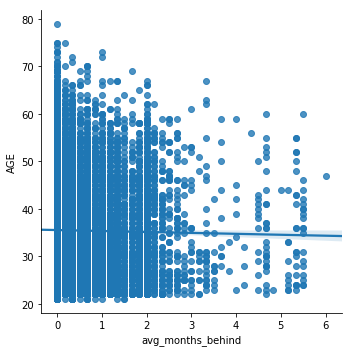

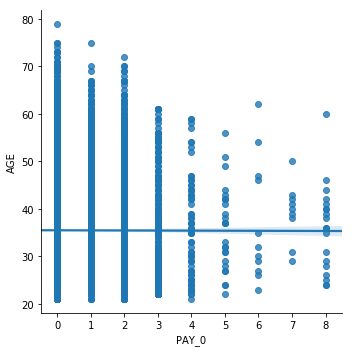

In [89]:
df2 = df.copy()
pay_dict =  {-2:0, -1:0, 0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8}
df2['PAY_0'] = df2.PAY_0.map(pay_dict)

df2['PAY_2'] = df2.PAY_2.map(pay_dict)

df2['PAY_3'] = df2.PAY_3.map(pay_dict)

df2['PAY_4'] = df2.PAY_4.map(pay_dict)
df2['PAY_5'] = df2.PAY_5.map(pay_dict)
df2['PAY_6'] = df2.PAY_6.map(pay_dict)
df2['avg_months_behind'] = (df2.PAY_0 + df2.PAY_2 + df2.PAY_3 + df2.PAY_4 + df2.PAY_5 + df2.PAY_6) /6
sns.lmplot('avg_months_behind','AGE', data=df2)
plt.show()
sns.lmplot('PAY_0','AGE', data=df2)
plt.show()

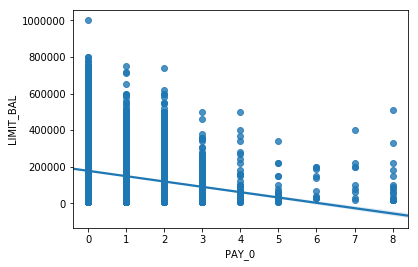

In [90]:
sns.regplot(df.PAY_0, df.LIMIT_BAL, scatter = True, fit_reg=True)
plt.show()

In [91]:
df3 = df.copy()
df3 = df3[(df.EDUCATION == 1)| (df.EDUCATION == 2) | (df.EDUCATION == 3) | (df.EDUCATION == 11)]
print(df3.head())
edu_dict ={1: 'Grad_School', 2: 'University', 3: 'High School' }
df3['EDUCATION'] = df2.EDUCATION.map(edu_dict)
df3['EDUCATION'].value_counts()

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2      0      0   
1   2   120000.0    2          2         2   26      0      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57      0      0      0      0   

   ...  PAY_AMT1  PAY_AMT2  default.payment.next.month  PERCENT_LIMIT  \
0  ...       0.0     689.0                           1       0.195650   
1  ...       0.0    1000.0                           1       0.022350   
2  ...    1518.0    1500.0                           0       0.324878   
3  ...    2000.0    2019.0                           0       0.939800   
4  ...    2000.0   36681.0                           0       0.172340   

   ever_default  Limit/history  Total_PAY_AMT  avg_months_behind  \
0             1   

University     14030
Grad_School    10585
High School     4917
Name: EDUCATION, dtype: int64

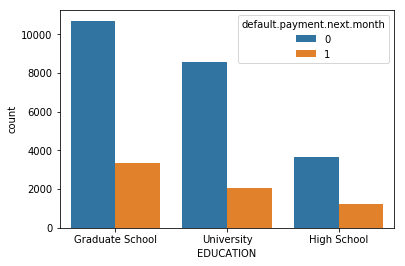

In [92]:
#barplot with education and hue as 0 vs 1
sns.countplot('EDUCATION', hue = 'default.payment.next.month', data= df3)
plt.xticks([0, 1, 2], ['Graduate School', 'University', 'High School'])
plt.show()

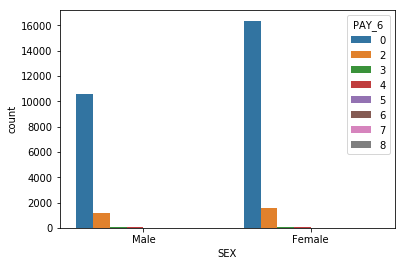

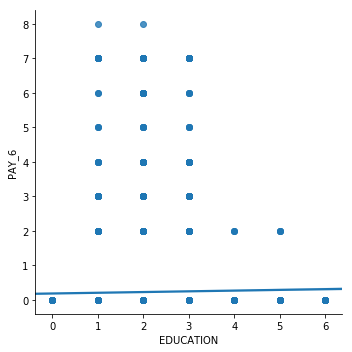

In [93]:
# notice the first one is much better at showing categorical data. 
# Scatter plot is innapropriate for categorical data
sns.countplot('SEX', hue = 'PAY_6', data = df)
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()
sns.lmplot('EDUCATION', 'PAY_6', data = df2)
plt.show()


KeyError: 'BILL_AMT5'

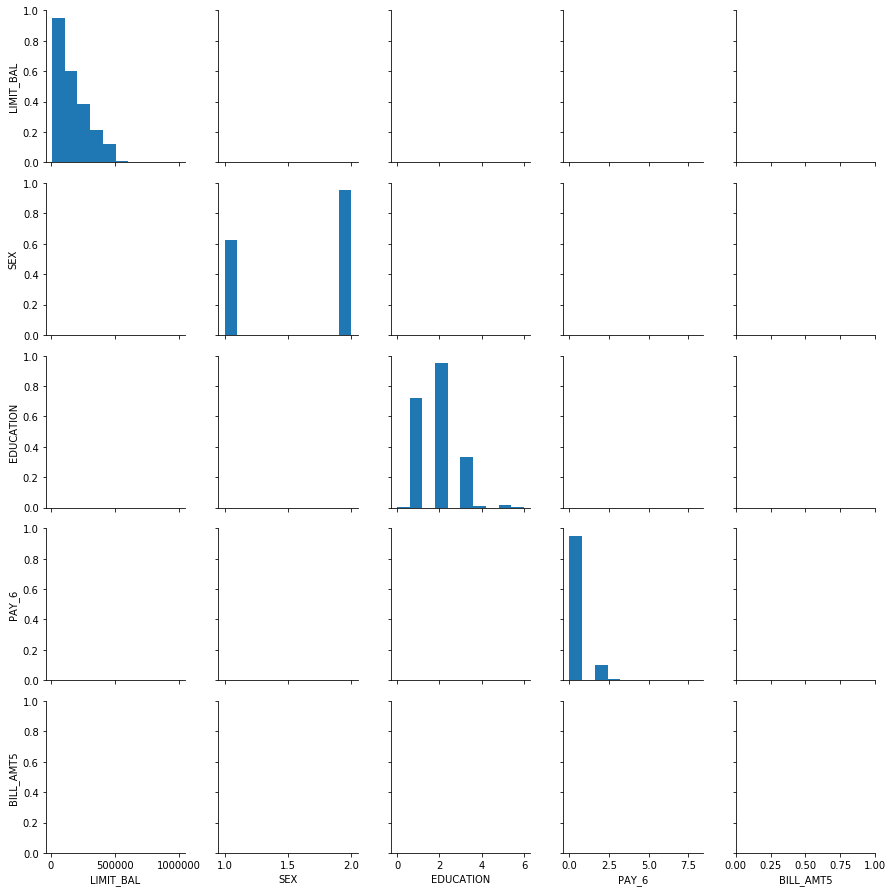

In [94]:
sns.pairplot(data= df2, vars = ['LIMIT_BAL','SEX','EDUCATION','PAY_6','BILL_AMT5'])
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# Create arrays for the features and the response variable
X= df.drop('default.payment.next.month', axis = 1)
y= df['default.payment.next.month'] 

                           




In [ ]:
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
weighted_neighbors = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .24, random_state=21)

In [ ]:
# Setup arrays to store train and test accuracies
parameters ={'n_neighbors' : np.arange(1, 20)}
knn_cv = GridSearchCV(weighted_neighbors,  param_grid = parameters )
knn_cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print(cv.best_params_)
print(cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = .15,  random_state = 25)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier( n_neighbors = 18)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.linear_model import Lasso
df_columns = X.columns
lasso = Lasso(alpha = .1)
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)
plt.figure(figsize=(20,10))
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#dt = DecisionTreeClassifier(max_depth = 5, criterion='gini', random_state = 1)

y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, stratify = y,)
rf = RandomForestClassifier(n_estimators = 12, max_depth = 6)
#bc = BaggingClassifier( base_estimator = dt, n_estimators = 300, n_jobs = -1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
#acc = accuracy_score(y_test, y_pred)
#print(acc)
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#rf.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
#GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)

In [ ]:
dtboost = DecisionTreeClassifier(max_depth = 1, random_state = 1)
adb_clf = AdaBoostClassifier(base_estimator = dtboost, n_estimators = 1000, learning_rate = .009)
adb_clf.fit(X_train, y_train)
y_adb_pred = adb_clf.predict(X_test)
#y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
acc = accuracy_score(y_test, y_adb_pred)
print(acc)
print(confusion_matrix(y_test, y_adb_pred))
print(classification_report(y_test, y_adb_pred))
#print(classification_report(y_test, y_pred))
#[0.4950679  0.49632313 0.49396204 ... 0.49592323 0.49541812 0.49888901]

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(learning_rate=0.005, subsample = .6, max_features = .4,  n_estimators=500)
GBC.fit(X_train, y_train)
GBC_pred = GBC.predict(X_test)
GBC_acc = accuracy_score(y_test, GBC_pred)
print(GBC_acc)
print(confusion_matrix(y_test, GBC_pred))
print(classification_report(y_test, GBC_pred))
# .1 
#0.8202666666666667
#[[5560  281]
 #[1067  592]]

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(learning_rate=0.005, subsample = .8, max_features = .4,  n_estimators=500)
GBC.fit(X_train, y_train)
GBC_pred = GBC.predict(X_test)
GBC_acc = accuracy_score(y_test, GBC_pred)
print(GBC_acc)
print(confusion_matrix(y_test, GBC_pred))
print(classification_report(y_test, GBC_pred))
# .1 
#0.8202666666666667
#[[5560  281]
 #[1067  592]]

In [ ]:
dt = DecisionTreeClassifier(max_depth = 8, criterion='gini')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .25, )
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
